<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n250.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.475033,66.715400,51.489544,3.657993,219.337969,215.255582,4.082387
1,0.0,1.0,31.091283,87.830877,60.512343,-9.967401,179.467103,189.796370,-10.329267
2,0.0,2.0,41.673619,84.765264,60.369906,-11.386662,185.422127,197.017157,-11.595030
3,0.0,3.0,34.048050,21.730295,87.669256,2.818921,156.266521,152.030044,4.236478
4,0.0,4.0,68.782729,62.274988,57.094183,-4.890458,193.261443,197.717050,-4.455607
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,77.553445,21.504820,88.352726,2.257337,199.668328,196.263106,3.405222
249996,999.0,246.0,73.450426,84.105862,90.075440,1.867910,259.499639,257.936612,1.563027
249997,999.0,247.0,71.363747,61.993677,79.074206,-5.672793,216.758837,222.386576,-5.627739
249998,999.0,248.0,54.890410,61.979128,25.660933,-7.215730,145.314741,153.351804,-8.037063


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.475033,66.715400,51.489544,3.657993,219.337969,215.255582,4.082387
1,0.0,1.0,31.091283,87.830877,60.512343,-9.967401,179.467103,189.796370,-10.329267
2,0.0,2.0,41.673619,84.765264,60.369906,-11.386662,185.422127,197.017157,-11.595030
3,0.0,3.0,34.048050,21.730295,87.669256,2.818921,156.266521,152.030044,4.236478
4,0.0,4.0,68.782729,62.274988,57.094183,-4.890458,193.261443,197.717050,-4.455607
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,77.553445,21.504820,88.352726,2.257337,199.668328,196.263106,3.405222
249996,999.0,246.0,73.450426,84.105862,90.075440,1.867910,259.499639,257.936612,1.563027
249997,999.0,247.0,71.363747,61.993677,79.074206,-5.672793,216.758837,222.386576,-5.627739
249998,999.0,248.0,54.890410,61.979128,25.660933,-7.215730,145.314741,153.351804,-8.037063


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    87.475033  66.715400  51.489544   3.657993  219.337969   
      1.0    31.091283  87.830877  60.512343  -9.967401  179.467103   
      2.0    41.673619  84.765264  60.369906 -11.386662  185.422127   
      3.0    34.048050  21.730295  87.669256   2.818921  156.266521   
      4.0    68.782729  62.274988  57.094183  -4.890458  193.261443   
...                ...        ...        ...        ...         ...   
999.0 245.0  77.553445  21.504820  88.352726   2.257337  199.668328   
      246.0  73.450426  84.105862  90.075440   1.867910  259.499639   
      247.0  71.363747  61.993677  79.074206  -5.672793  216.758837   
      248.0  54.890410  61.979128  25.660933  -7.215730  145.314741   
      249.0  61.210919  99.533688  88.268787  -1.980893  257.032501   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    215.255582   4.082387  
      1.0    189.796370 -10.329267  
      2.0    197.017157 -11.595030  
      3.0    152.030044   4.236478  
      4.0    197.717050  -4.455607  
...                 ...        ...  
999.0 245.0  196.263106   3.405222  
      246.0  257.936612   1.563027  
      247.0  222.386576  -5.627739  
      248.0  153.351804  -8.037063  
      249.0  259.539433  -2.506932  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    87.475033  66.715400  51.489544   3.657993  219.337969   
      1.0    31.091283  87.830877  60.512343  -9.967401  179.467103   
      2.0    41.673619  84.765264  60.369906 -11.386662  185.422127   
      3.0    34.048050  21.730295  87.669256   2.818921  156.266521   
      4.0    68.782729  62.274988  57.094183  -4.890458  193.261443   
...                ...        ...        ...        ...         ...   
999.0 245.0  77.553445  21.504820  88.352726   2.257337  199.668328   
      246.0  73.450426  84.105862  90.075440   1.867910  259.499639   
      247.0  71.363747  61.993677  79.074206  -5.672793  216.758837   
      248.0  54.890410  61.979128  25.660933  -7.215730  145.314741   
      249.0  61.210919  99.533688  88.268787  -1.980893  257.032501   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    215.255582   4.082387  
      1.0    189.796370 -10.329267  
      2.0    197.017157 -11.595030  
      3.0    152.030044   4.236478  
      4.0    197.717050  -4.455607  
...                 ...        ...  
999.0 245.0  196.263106   3.405222  
      246.0  257.936612   1.563027  
      247.0  222.386576  -5.627739  
      248.0  153.351804  -8.037063  
      249.0  259.539433  -2.506932  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.475033,66.715400,51.489544,3.657993,219.337969,215.255582,4.082387
1,0.0,1.0,31.091283,87.830877,60.512343,-9.967401,179.467103,189.796370,-10.329267
2,0.0,2.0,41.673619,84.765264,60.369906,-11.386662,185.422127,197.017157,-11.595030
3,0.0,3.0,34.048050,21.730295,87.669256,2.818921,156.266521,152.030044,4.236478
4,0.0,4.0,68.782729,62.274988,57.094183,-4.890458,193.261443,197.717050,-4.455607
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,77.553445,21.504820,88.352726,2.257337,199.668328,196.263106,3.405222
249996,999.0,246.0,73.450426,84.105862,90.075440,1.867910,259.499639,257.936612,1.563027
249997,999.0,247.0,71.363747,61.993677,79.074206,-5.672793,216.758837,222.386576,-5.627739
249998,999.0,248.0,54.890410,61.979128,25.660933,-7.215730,145.314741,153.351804,-8.037063


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    87.475033  66.715400  51.489544   3.657993  219.337969   
      1.0    31.091283  87.830877  60.512343  -9.967401  179.467103   
      2.0    41.673619  84.765264  60.369906 -11.386662  185.422127   
      3.0    34.048050  21.730295  87.669256   2.818921  156.266521   
      4.0    68.782729  62.274988  57.094183  -4.890458  193.261443   
...                ...        ...        ...        ...         ...   
999.0 245.0  77.553445  21.504820  88.352726   2.257337  199.668328   
      246.0  73.450426  84.105862  90.075440   1.867910  259.499639   
      247.0  71.363747  61.993677  79.074206  -5.672793  216.758837   
      248.0  54.890410  61.979128  25.660933  -7.215730  145.314741   
      249.0  61.210919  99.533688  88.268787  -1.980893  257.032501   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    215.255582   4.082387  
      1.0    189.796370 -10.329267  
      2.0    197.017157 -11.595030  
      3.0    152.030044   4.236478  
      4.0    197.717050  -4.455607  
...                 ...        ...  
999.0 245.0  196.263106   3.405222  
      246.0  257.936612   1.563027  
      247.0  222.386576  -5.627739  
      248.0  153.351804  -8.037063  
      249.0  259.539433  -2.506932  

[250000 rows x 7 columns]

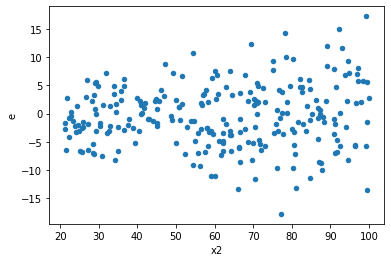

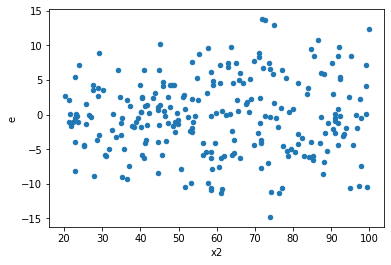

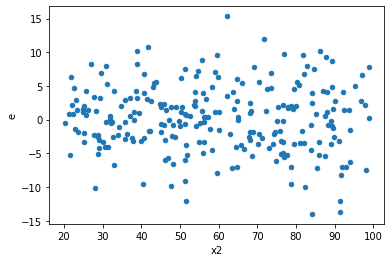

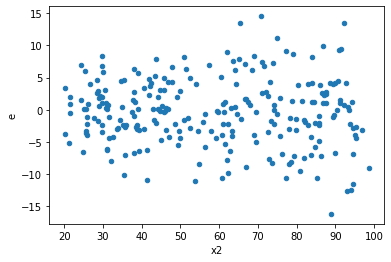

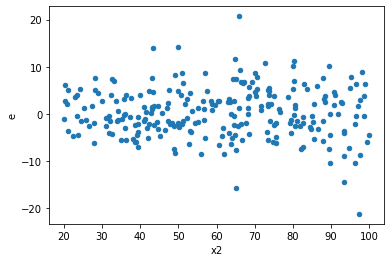

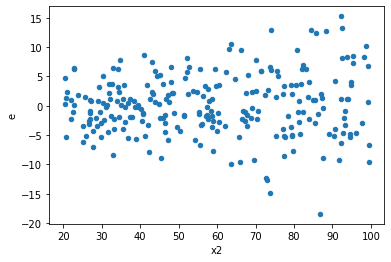

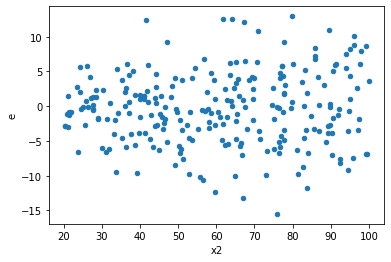

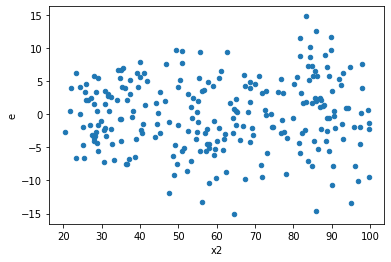

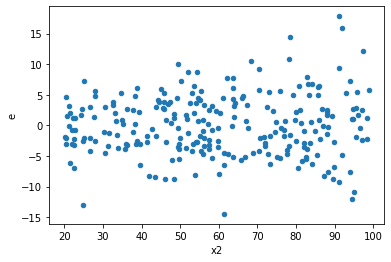

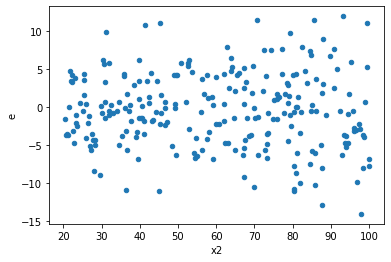

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,2066.4247244042544,3607.1941110224857,21.303347674270665,37.18756815487099,1.7456208631371422,0.006547126081652976,0.9967264369591735,0.003273563040826488,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,2557.011745518649,3101.5388470727253,26.360945830089168,31.97462728940954,1.2129544780184915,0.3433708829198554,0.8283145585400723,0.1716854414599277,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,2396.654812455111,2647.2275412181884,24.707781571702174,27.291005579568953,1.1045510298190975,0.625323693950012,0.687338153024994,0.312661846975006,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,2271.3963371569052,3384.8217331001483,23.416457084091807,34.89506941340359,1.4901942376718418,0.050830373671649776,0.9745848131641751,0.025415186835824888,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,2447.5538108488277,2757.790822195522,25.232513513905438,28.43083321851054,1.126753908319222,0.5578758343675871,0.7210620828162064,0.27893791718379357,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,2050.593037975056,3699.153398354616,21.14013441211398,38.13560204489295,1.803943215377099,0.004011535110032272,0.9979942324449839,0.002005767555016136,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,2626.1050728813684,2854.9183376806213,27.073248174034727,29.432147811140425,1.0871302779017133,0.6816038288961725,0.6591980855519137,0.3408019144480863,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,2251.917395183587,3238.794940959525,23.215643249315328,33.38963856659304,1.4382387861502723,0.07504924151738579,0.9624753792413071,0.037524620758692895,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,1923.1513687992226,2654.2293713438517,19.826302771126006,27.36318939529744,1.380145845202554,0.11430850290122319,0.9428457485493884,0.05715425145061159,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,2066.4247244042544,3607.1941110224857,21.303347674270665,37.18756815487099,1.7456208631371422,0.006547126081652976,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,2557.011745518649,3101.5388470727253,26.360945830089168,31.97462728940954,1.2129544780184915,0.3433708829198554,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,2396.654812455111,2647.2275412181884,24.707781571702174,27.291005579568953,1.1045510298190975,0.625323693950012,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,2271.3963371569052,3384.8217331001483,23.416457084091807,34.89506941340359,1.4901942376718418,0.050830373671649776,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,2447.5538108488277,2757.790822195522,25.232513513905438,28.43083321851054,1.126753908319222,0.5578758343675871,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,2050.593037975056,3699.153398354616,21.14013441211398,38.13560204489295,1.803943215377099,0.004011535110032272,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,2626.1050728813684,2854.9183376806213,27.073248174034727,29.432147811140425,1.0871302779017133,0.6816038288961725,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,2251.917395183587,3238.794940959525,23.215643249315328,33.38963856659304,1.4382387861502723,0.07504924151738579,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,1923.1513687992226,2654.2293713438517,19.826302771126006,27.36318939529744,1.380145845202554,0.11430850290122319,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      765
Reject001=0 : Heteroscedasticity    235
Name: Result_test, dtype: int64